In [ ]:
# Implement Simple Autoencoder to Reconstruct MNIST Digits with Sparsity Constraint

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [11]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [13]:
def build_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    # Add sparsity constraint to the encoded layer
    encoded = MaxPooling2D((2, 2), padding='same', activity_regularizer=regularizers.l1(1e-5))(x)
    
    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    return autoencoder

In [14]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [15]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 234ms/step - loss: 0.3594 - val_loss: 0.1124
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 56s 236ms/step - loss: 0.1078 - val_loss: 0.0970
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 268ms/step - loss: 0.0964 - val_loss: 0.0911
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 363ms/step - loss: 0.0907 - val_loss: 0.0870
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 71s 302ms/step - loss: 0.0873 - val_loss: 0.0846
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 329ms/step - loss: 0.0850 - val_loss: 0.0827
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 261ms/step - loss: 0.0831 - val_loss: 0.0809
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 298ms/step - loss: 0.0815 - val_loss: 0.0795
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 64s 270ms/step - loss: 0.0800 - val_loss: 0.0786
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 289ms/step - loss: 0.0789 - val_loss: 0.0773
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 322ms/step - loss: 0.0781 - val_loss: 0.0773
Epoch 12/20
235/235

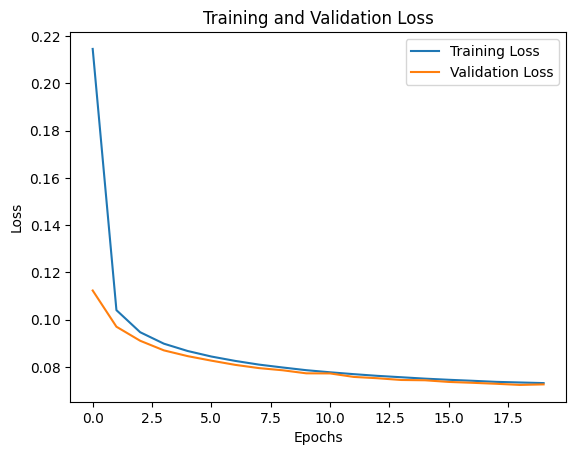

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[4].output)

# Generate encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


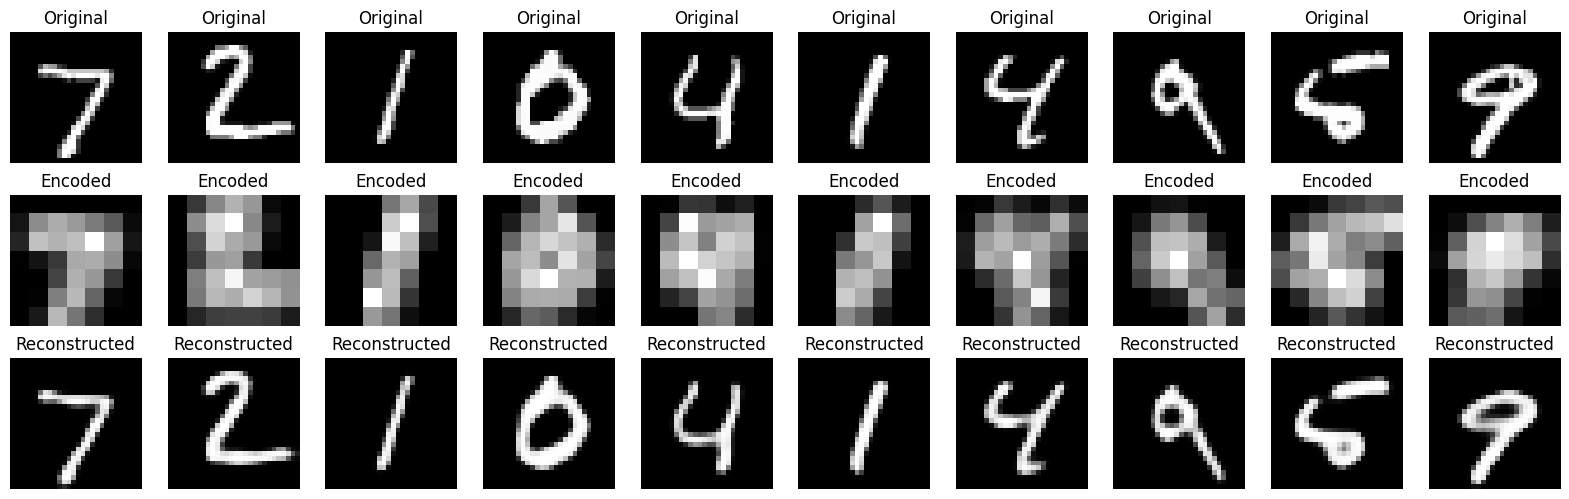

In [18]:
def plot_comparison_with_encoded(n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Display original image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display encoded image (latent space representation)
        ax = plt.subplot(3, n, i + 1 + n)
        
        encoded_image = encoded_imgs[i]
        if len(encoded_image.shape) == 3:
            encoded_image = np.mean(encoded_image, axis=-1)
        
        plt.imshow(encoded_image, cmap='gray')
        plt.title("Encoded")
        plt.axis('off')

        # Display reconstructed image
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Plot original, encoded, and reconstructed images
plot_comparison_with_encoded(n=10)